In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# sel should be done after ReLU
# before or after BN
# outliers! -> maybe we can see how the network becomes dependent on single directions
# upon memorization
# figure 2

with open("./log/epoch10/sel.pickle", "rb") as f:
    sel = pickle.load(f)

with open("./log/epoch10/imp.pickle", "rb") as f:
    imp = pickle.load(f)

In [ ]:
sel[0], np.array(imp[0]) / 10000.

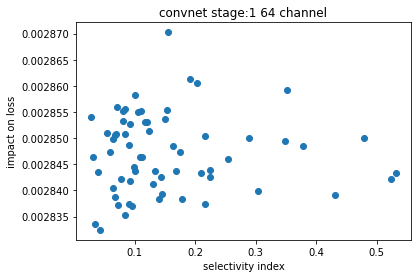

In [2]:
plt.title("convnet stage:1 64 channel")
plt.xlabel("selectivity index")
plt.ylabel("impact on loss")
plt.scatter(sel[0], np.array(imp[0]) / 10000)
plt.show()

<ipython-input-114-df8a5931e5fe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_facecolor(".9")


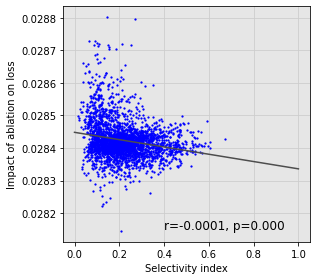

In [114]:
plt.rcParams["figure.figsize"] = (4.5, 4)
for i in range(len(sel)):
    plt.scatter(sel[i], np.array(imp[i]) / 1000, s=1.5, color="b")
plt.xlabel("Selectivity index")
plt.ylabel("Impact of ablation on loss")
plt.grid(True, color=".8")

plt.plot([0, 1], np.array([[0.02844823], [0.02833615]]), color="0.3")
plt.text(0.4, 0.02815, s="r=-0.0001, p=0.000", fontsize=12)

plt.axes().set_facecolor(".9")

plt.rcParams['savefig.facecolor']='1.'
plt.rcParams['savefig.edgecolor']='1.'
plt.tight_layout()
plt.savefig("./log/CIFAR_fail_selimp.jpg", dpi=400, transparent=False)

In [11]:
from sklearn.linear_model import LinearRegression

corr_list = []
for i in range(len(imp) - 1):
    fit = LinearRegression().fit(np.array(sel[i]).reshape([-1, 1]), np.array(imp[i]).reshape([-1, 1]) / 1000.)
    corr_list.append(fit.coef_[0, 0])

<ipython-input-115-3b055012de5d>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


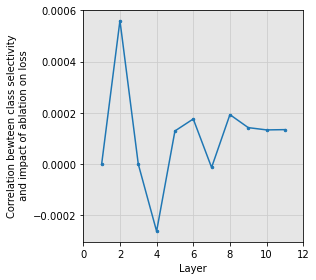

In [115]:
plt.rcParams["figure.figsize"] = (4.5, 4)
plt.grid(True, color=".8")
ax = plt.axes()
ax.set_facecolor(".9")
plt.plot(range(1, 12), corr_list + [0.0001345], marker='o', markersize=2.5)
plt.xlabel("Layer")
plt.xlim((0, 12))
plt.ylabel("Correlation bewteen class selectivity\n and impact of ablation on loss")
plt.tight_layout()
plt.savefig("./log/CIFAR_fail_corr.jpg", dpi=400, transparent=False)

In [27]:
corr_list

[array([[-0.00080827]], dtype=float32),
 array([[0.56013036]], dtype=float32),
 array([[-0.00020393]], dtype=float32),
 array([[-0.26234886]], dtype=float32),
 array([[0.12929243]], dtype=float32),
 array([[0.17614952]], dtype=float32),
 array([[-0.01325605]], dtype=float32),
 array([[0.19304866]], dtype=float32),
 array([[0.14236085]], dtype=float32),
 array([[0.13342494]], dtype=float32),
 array([[0.08701723]], dtype=float32)]

In [31]:
6952 / 10000 * 256

177.9712

In [63]:
imp_all = np.array([i for j in imp for i in j]).reshape((-1, 1)) / 1000.
sel_all = np.array([i for j in sel for i in j]).reshape((-1, 1))
fit = LinearRegression().fit(sel_all, imp_all)

In [64]:
fit.coef_, fit.intercept_

(array([[-0.00011208]], dtype=float32), array([0.02844823], dtype=float32))

In [66]:
fit.predict(np.array([[0, ], [1, ]]))

array([[0.02844823],
       [0.02833615]])